## Datacamp Technical Report
# BMW Used Car Price Prediction
Qiwei Men, 03/29/2020

----
BMW is one of the best selling premium brand in the world，in this project I will conduct a exploratory data analysis on the BMW used car sale dataset, then build machine learning models to predict the price of used cars with multiple variables. We will also evaluate and compare the performance of these two models.

<img src="BMW.jpg" style="width: 400px;">


In this project, I will go though these steps 

- **Part I: Data Analysis**

- **[Importing Data from a File](#download-the-data)**
    
    - Take a quick look at the data structure
    - Split data into training and testing set

- **[Discover and Visualize the Data](#idiscover-and-visualize-the-data)**

    - Find correlations
    - Check Outliers with Boxplot     
       
- **[Regression Analysis with statsmodels](#regression-analysis)**
    
    - Build mltiple linear regression model
    - Regression diagnostic
    
    
- **Part II: Machine Learning with scikit-learn**

- **[Prepare the data for Modeling](#prepare-the-data-for-modeling)**

    - Clean the data
    - Split the data into data and labels
    - Standarize the numeric data
    - One-Hot Encoding the categorical data
    
- **[Build Machine learning Models](#build-machine-learning-models)**

    - Splitting data into Dependent and Independent Variables
    - One-Hot-Encoding
    - Centering and Scaling the Data 
    
- **[Optimize Parameters with RandomSearch](#optimize-parameters)**


- **[Evaluate the Optimized Model on testing data](#evaluate-model)**


***

In [134]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

-----

<a id="download-the-data"></a>
# Part I :  Data Analysis
# Import the data
The very first thing we do is load in the dataset from the **[Datacamp GitHub](https://github.com/datacamp/careerhub-data)** .
Specifically, we are going to use the **[BMW Used Car Sales](https://github.com/datacamp/careerhub-data/blob/master/BMW%20Used%20Car%20Sales/bmw.csv)** dataset. This dataset will allow us to predict the `price` of BMW cars based on their `model`, `year`, `transmission`, `mileage`, `fuelType`, `tax`, `mpg` and `engineSize`.

In [5]:
df = pd.read_csv("bmw.csv") 

## Take a quick look at the data structure
Now that we have loaded the data into a **data frame** called **df**, let's look at the first five rows using the `head()` function:

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


We see a bunch of columns for the variables collected for each saled car. The columns are...
- **model**, The model of the car, 24 levels
- **year**, Year of production, from 1996 to 2019
- **price**, The price of the car
- **transmission**, transmission type of the car, 3 levels
- **mileage**, The total miles traveled
- **fuelType**, How the car powered, 5 levels
- **tax_**, When the last 6 bills were payed
- **mpg**, energy cost by miles per gallon
- **engineSize**, The eigine size of the car

Then get a quick description of the data, like the total nmber of rows, each attribute's type, and the number of nonnull values using the `info()` function:.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


There are 10781 instances and 9 columns in the dataset, we also notice that there's no null entries, and the format of the enties are pretty consistant, which means the dataset may has been cleaned. In these 9 attributes,  `year`, `price`, `mileage`, `tax`, `mpg` and `engineSize` are numerical attributes, `model`, `transmission`, `fuelType` are categorical attributes. we can use `value_counts()` function to check what categories exist and how many cars belong to each category. For example, let's check the categories of `fuelType`.

In [15]:
df["fuelType"].value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

In [18]:
df[df["fuelType"]=="Electric"]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8375,i3,2017,18999,Automatic,20321,Electric,135,470.8,0.0
8400,i3,2016,18999,Automatic,9990,Electric,0,470.8,0.0
8835,i3,2015,17400,Automatic,29465,Electric,0,470.8,1.0


we can see that most cars are powered by dissel or petrol, though electric has already become a trend in automobile industry, BMW still stick to the traditional market and seems alittle bit behind in this competition, the only eletric model they have in the market is i3.

Next, let's take a look at the summary of the numerical data by using `describe()` function

In [22]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


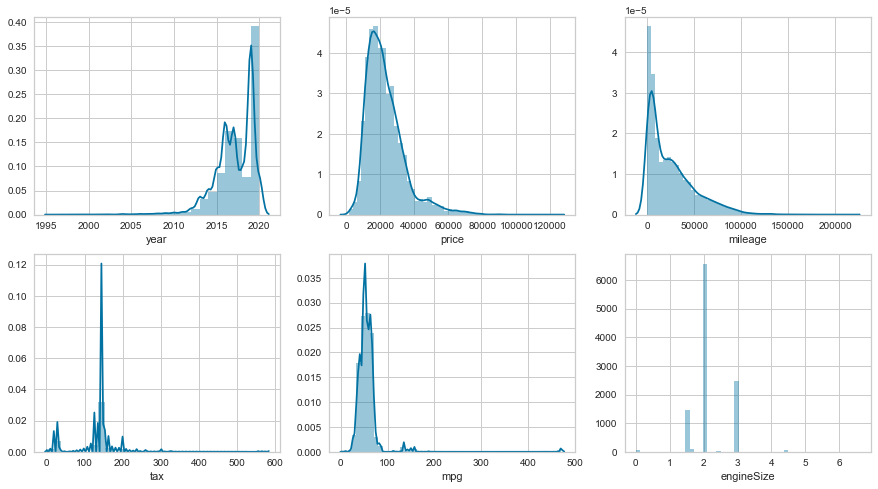

In [135]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.distplot(df['year'], ax=axes[0, 0], bins = 24)
sns.distplot(df['price'], ax=axes[0, 1])
sns.distplot(df['mileage'],ax=axes[0, 2])
sns.distplot(df['tax'], ax=axes[1, 0],bins = 30)
sns.distplot(df['mpg'], ax=axes[1, 1])
sns.distplot(df['engineSize'], ax=axes[1, 2], kde=False)
plt.show()

Another quick way to get a feel ofthe type of data os to plot histogram for each numerical attribute.

There are few things we can notice in these histograms:
1. The target value `price` is right skewed, in order to have a better result in the prediction, we need do a log transformation.s
2. The `mileage` attribute is seriously right skewed, which means most of the cars did not drive long before they were sold.
3. The `tax` mainly distribute between 100 and 200, there's also a lower peak under 50, which means the tax does not purely depend on the price, it may also reflact the difference in tax ploicy of different states.
4. Most cars have `engineSize` smaller than 3.

We can also check the barplot of categorical data.

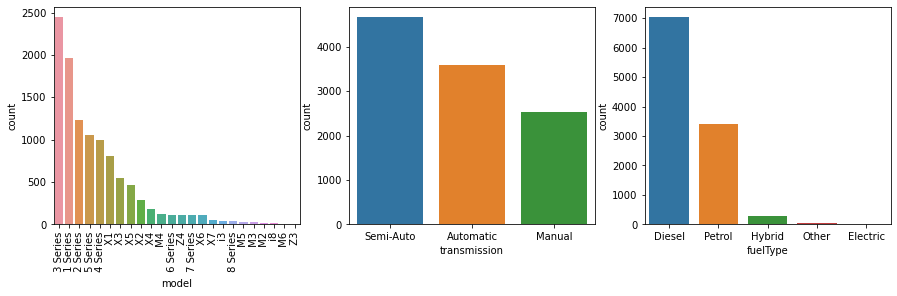

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = sns.countplot(x = "model", data = df, order = df['model'].value_counts().index, ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.countplot(x ='transmission', data = df,  order = df['transmission'].value_counts().index, ax=axes[1])
sns.countplot(x ='fuelType', data = df, order = df['fuelType'].value_counts().index, ax=axes[2])

From the barplot we can see that:
1. The best-selling `model` are classical 1-5 Series
2. Cars with Semi-Auto and Auto `transmission` are more popular than cars with manual transmission
3. In terms of `fuelType`， Most cars are powered by dissel or petrol

## Split data into training and testing set
Before we do a further investigation, we need to split the data into training part and testing part, the training part is used for training the model, the testing data is used for testing the performance of the model. In this project, we will use 30% of the data for testing.

In [11]:
train, test = train_test_split(df, test_size = 0.3, random_state = 72, stratify = df["model"])

Note: Since we need both the training and testing set include all the models, so we can make prediction of a new instance in any model, so we set the argument `stratify='model'`.

In [12]:
train.shape

(7546, 9)

In [13]:
test.shape

(3235, 9)

The data is splited successfully!

----

<a id="discover-and-visualize-the-data"></a>
# Discover and Visualize the Data 
So far, we have only taken a quick glance at the data to get a general understanding of the kind of data we are have, now the goal is to go into a little more depth. In this part, we put the test aside and only explore the training set, we creat a copy named bmw, so that we can play with it without harming the training set.

In [14]:
bmw = train.copy()

## Looking for Correlations
Since the data set is not too large, we can easily compute the standard correlation coefficient between every pair of attributes using `corr()` method:

In [15]:
corr_matrix = bmw.corr()
corr_matrix

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.625621,-0.780979,0.005143,-0.066922,-0.032303
price,0.625621,1.000000,-0.606931,0.250127,-0.199308,0.453891
mileage,-0.780979,-0.606931,1.000000,-0.142991,0.112978,-0.002354
tax,0.005143,0.250127,-0.142991,1.000000,-0.348428,0.427828
mpg,-0.066922,-0.199308,0.112978,-0.348428,1.000000,-0.396684
engineSize,-0.032303,0.453891,-0.002354,0.427828,-0.396684,1.000000


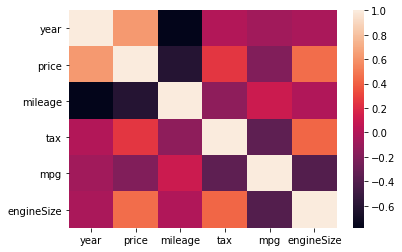

In [16]:
sns.heatmap(corr_matrix)
plt.show()

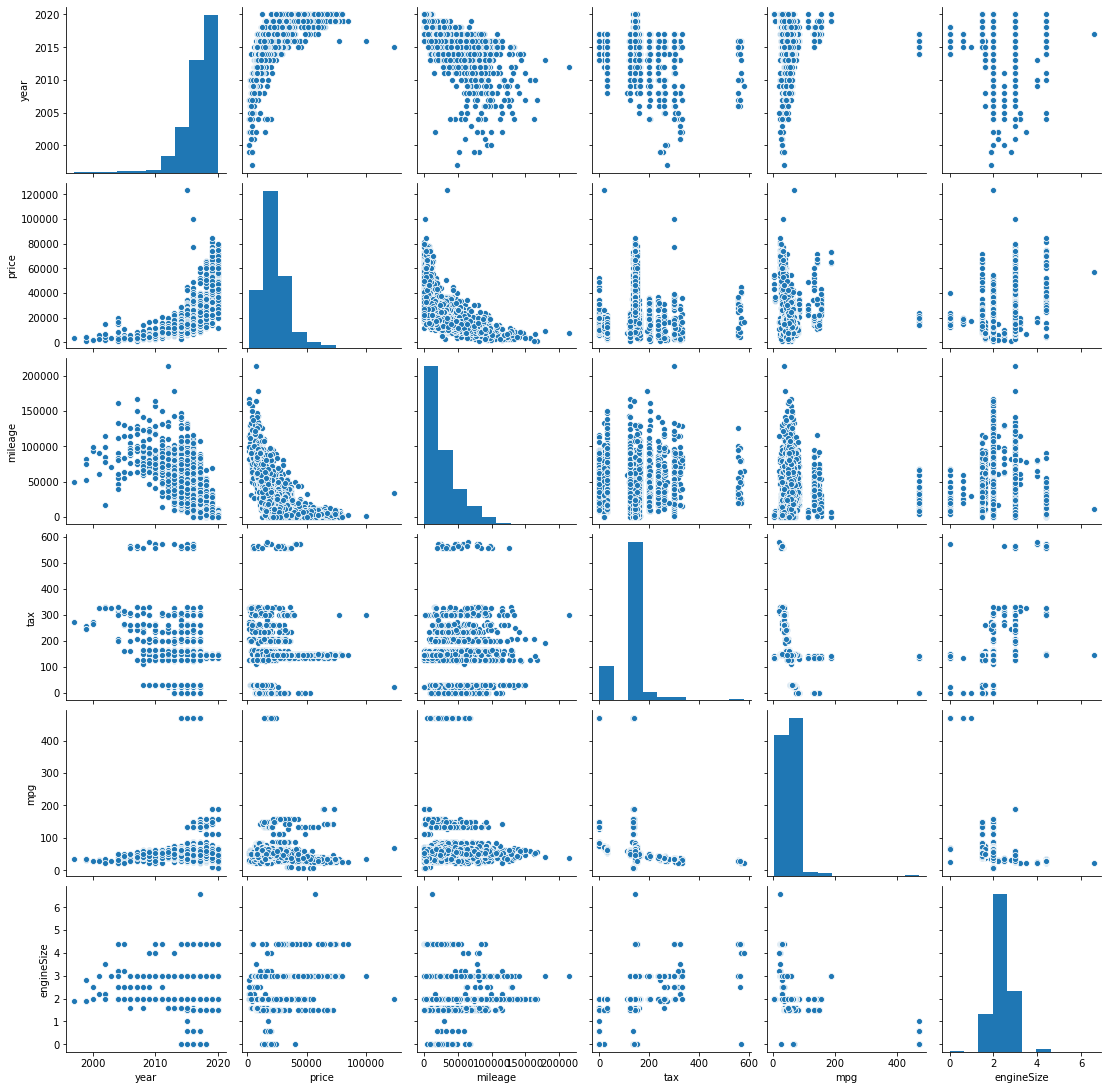

In [97]:
sns.pairplot(bmw)
plt.show()

From the heatmap and pairplot, we can see that there's a strong postive corrolation between `price` and `year`, there's also a strong negative corrolation between `price` and `mileage`, so the most promising attributes to predict the price is `year` and `mileage`.

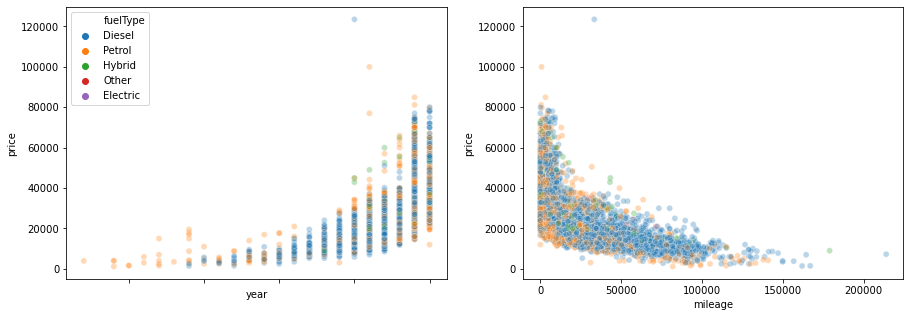

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = sns.scatterplot(x = "year", y = "price",data = bmw, alpha = 0.3, hue = 'fuelType', ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
handles, labels = ax.get_legend_handles_labels()
sns.scatterplot(x ='mileage', y = "price", data = bmw, alpha = 0.3,hue = "fuelType", legend= False, ax=axes[1])
plt.show()

As we have seen in the last section, the distribution of `price` is right skewed, a log transformation is necessary. 

In [18]:
bmw["log_price"] = np.log(bmw["price"])

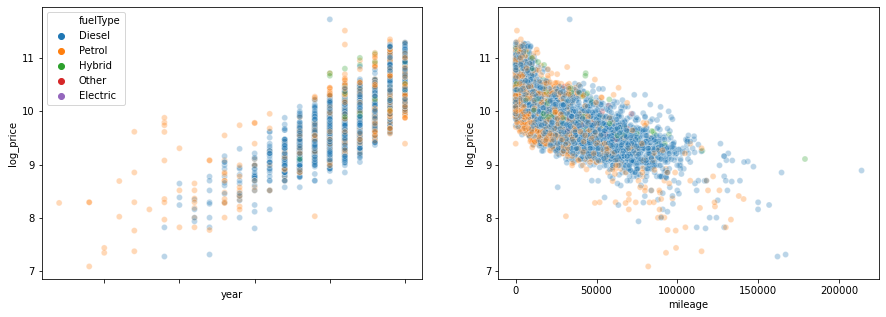

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = sns.scatterplot(x = "year", y = "log_price",data = bmw, alpha = 0.3, hue = 'fuelType', ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
handles, labels = ax.get_legend_handles_labels()
sns.scatterplot(x ='mileage', y = "log_price", data = bmw, alpha = 0.3,hue = "fuelType", legend= False, ax=axes[1])
plt.show()

After the transformation, the linear relationship become stronger.

## Check Outliers with Boxplot
As we know, the price of a car depends not only on the mileage and year of manufacture, but also on its model, some models are more luxurious and some are more economical, so we find out the average price of these cars by looking at the median price of each model

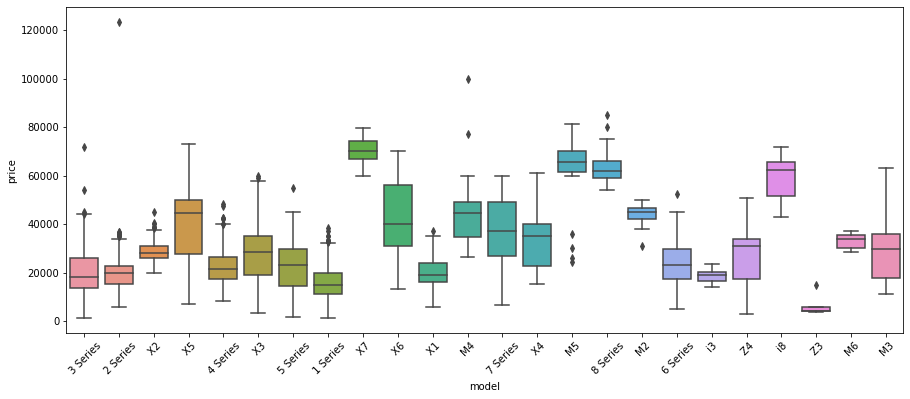

In [469]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x="model", y="price", data=bmw)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

From the boxplot above, we can also identify that models like X7, M5 and 8 Series are more expensive than others，on the other hand, the only eletric model i3 is not as expensive as we thought, which only costs about $ 20000.

From the boxplot, we notice that the price of one point in 2 Series is unusually high, let's check if there's anything abnormal happens.

In [20]:
bmw[bmw['price']>100000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,log_price
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0,11.72364


We find that this observation is an 2-Series model with price 123456, it doesn't look like a real price, but like a human error. So this observation needs to be removed.

In [25]:
bmw = bmw[bmw['price']<100000]

----

<a id="regression-analysis"></a>
# Regression Analysis with statsmodels

**statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. In this section, we will use statsmodels to built a Ordinary Least Squares(ols) model and conduct regression analysis.

## Build a Multiple Linear Regression Model
In the last section, we saw that some attributes like `mileage` and `year` have linear relationship with `price_log`, other categorical attributes like `model` also infulence the `price`. So we built a simple linear model with only one attribute `year`.

In [142]:
reg_model_simple = ols("log_price ~  year", data=bmw).fit()

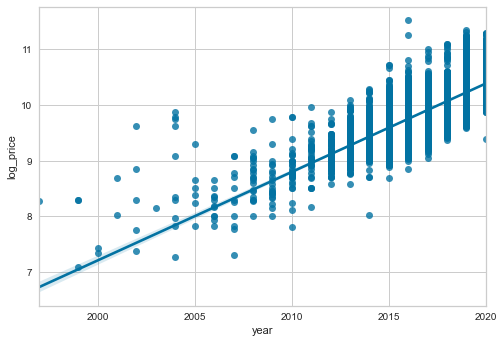

In [144]:
sns.regplot(x = "year", y="log_price", data=bmw)

From the regression plot, we can see that we can fit the model with a line with a slop and intercept. We can use `summary()` method to show the parameters and other infomation of the model

In [143]:
reg_model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                 1.146e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:42:21   Log-Likelihood:                -1779.1
No. Observations:                7545   AIC:                             3562.
Df Residuals:                    7543   BIC:                             3576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -309.8311      2.987   -103.726      0.000    -315.686    -303.976
year           0.1585      0.001    107.045      0.000       0.156       0.161
==============================================================================
Omnibus:                     1029.128   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2173.533
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       5.041   Cond. No.                     1.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The simple model which includes only 3 attributes has `R-Squared` equals to 0.896, `AIC` equals to -6287.
This means that the `year` attribute can explain 60% variance of the data.

Next we build a mulitiple regression model by using all attributes in the data.

In [28]:
reg_model = ols("log_price ~ mileage + year + model + tax + transmission + engineSize + mpg + fuelType",data=bmw).fit()

In [29]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3242.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:46:16   Log-Likelihood:                 5118.4
No. Observations:                7545   AIC:                        -1.017e+04
Df Residuals:                    7510   BIC:                            -9924.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -200.1521      2.105    -95.086      0.000    -204.278    -196.026
model[T. 2 Series]            0.0196      0.005      3.575      0.000       0.009       0.030
model[T. 3 Series]            0.1180      0.005     24.425      0.000       0.108       0.127
model[T. 4 Series]            0.1520      0.006     25.052      0.000       0.140       0.164
model[T. 5 Series]            0.1987      0.006     32.053      0.000       0.187       0.211
model[T. 6 Series]            0.2550      0.015     16.847      0.000       0.225       0.285
model[T. 7 Series]            0.4375      0.015     28.386      0.000       0.407       0.468
model[T. 8 Series]            0.6945      0.025     28.278      0.000       0.646       0.743
model[T. M2]                  0.4147      0.032     12.831      0.000       0.351       0.478
model[T. M3]                  0.7952      0.029     27.108      0.000       0.738       0.853
model[T. M4]                  0.5111      0.014     35.694      0.000       0.483       0.539
model[T. M5]                  0.5631      0.029     19.332      0.000       0.506       0.620
model[T. M6]                  0.4168      0.052      8.014      0.000       0.315       0.519
model[T. X1]                  0.1450      0.006     22.693      0.000       0.132       0.158
model[T. X2]                  0.1654      0.010     17.171      0.000       0.146       0.184
model[T. X3]                  0.3345      0.008     43.199      0.000       0.319       0.350
model[T. X4]                  0.3681      0.012     30.387      0.000       0.344       0.392
model[T. X5]                  0.5426      0.009     60.288      0.000       0.525       0.560
model[T. X6]                  0.5446      0.015     35.180      0.000       0.514       0.575
model[T. X7]                  0.8396      0.021     39.888      0.000       0.798       0.881
model[T. Z3]                  0.8561      0.057     14.905      0.000       0.744       0.969
model[T. Z4]                  0.1873      0.015     12.692      0.000       0.158       0.216
model[T. i3]                  1.4144      0.062     22.675      0.000       1.292       1.537
model[T. i8]                  1.1572      0.037     31.197      0.000       1.084       1.230
transmission[T.Manual]       -0.0876      0.004    -19.893      0.000      -0.096      -0.079
transmission[T.Semi-Auto]     0.0175      0.003      5.015      0.000       0.011       0.024
fuelType[T.Electric]          0.1753      0.076      2.300      0.021       0.026       0.325
fuelType[T.Hybrid]            0.2611      0.013     19.747      0.000       0.235       0.287
fuelType[T.Other]             0.2088      0.029      7.207      0.000       0.152       0.266
fuelType[T.Petrol]           -0.0256      0.004     -5.950      0.000      

After adding all the attributes to the model, R-squared increased to 0.936, AIC decreased to -10170, the fitness of the model has been improved a lot. All the attributes are statistically significant.

## Regression diagnostics
In many cases of statistical analysis, we are not sure whether our statistical model is correctly specified. For example when using ols, then linearity and homoscedasticity are assumed, some test statistics additionally assume that the errors are normally distributed or that we have a large sample. Since our results depend on these statistical assumptions, the results are only correct of our assumptions hold (at least approximately).One solution to the problem of uncertainty about the correct specification is to use robust methods, for example robust regression or robust covariance estimators. The second approach is to test whether our sample is consistent with these assumptions.

### Normality and Distribution of redisuals
The linear regression analysis requires all variables to be multivariate normal. This assumption can best be checked with a histogram or a Q-Q-Plot. Normality can be checked with a goodness of fit test.

In [31]:
# calculate the residuals
resid = reg_model.resid
# calculate standardized residuals
standardized_residuals = reg_model.get_influence().resid_studentized_internal

In [480]:
# calculate the fitted values
fitted_value = reg_model.fittedvalues

In [36]:
name = ['Chi^2', 'Two-tail probability']
norm_test = sms.omni_normtest(resid)
list(zip(name,norm_test))

[('Chi^2', 1010.1193414551312),
 ('Two-tail probability', 4.5224312261286885e-220)]

p-value is very small, which indidcate that the normality of residuals is satified, we can also verify this with qqplot.

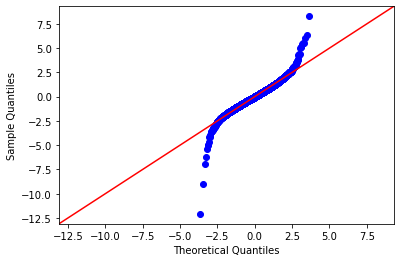

In [482]:
qqplot(data = resid, fit=True,line="45")
plt.show()

Most residuals are located on the diagnal line, but we should also notice that some points at the ends deviate from the line. This situation is normal in the real world data.

### Heteroskedasticity tests
The last assumption of the linear regression analysis is homoscedasticity.  The scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line).

In [41]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
hete_test = sms.het_breuschpagan(reg_model.resid, reg_model_simple.model.exog)
list(zip(name, hete_test))

[('Lagrange multiplier statistic', 299.66420225755246),
 ('p-value', 7.021056825998903e-49),
 ('f-value', 12.439313785713551),
 ('f p-value', 5.463621000114811e-50)]

p-value is very small, which means the residuals have consistent variance. This can also be verified by the plot of fitted value vers residuals.Most standardized residuals are within the range (-3,3)

[Text(0, 0.5, 'standardized_residuals'), Text(0.5, 0, 'fitted_value')]

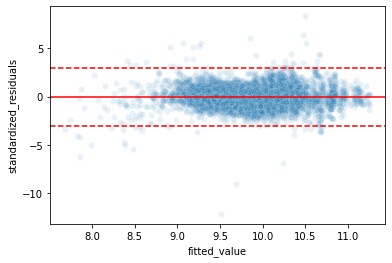

In [551]:
g = sns.scatterplot(x=fitted_value, y=standardized_residuals,alpha=0.1)
g.axhline(0, c='red')
g.axhline(3, ls='--', c='red')
g.axhline(-3, ls='--', c='red')
g.set(xlabel="fitted_value", ylabel="standardized_residuals")

### Outlier and Influence point
In the residual plot above, we can see some observations with large residual, these outliers have a large influence on the regression estimates. Let's first check the leverage and cook's distance.

In [44]:
summary = reg_model.get_influence().summary_frame()
leverage =  summary["hat_diag"]
cooks_dist = summary["cooks_d"]

Set the cuoff and eliminate the observation with cook's distance larger than the cutoff.

In [42]:
from scipy.stats import f
cutoff = f.ppf(0.5,34,7511)
print("cutoff:",cutoff)

cutoff: 0.9805491658961749


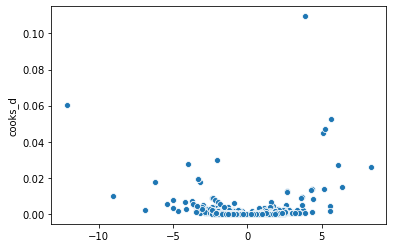

In [45]:
sns.scatterplot(x=standardized_residuals, y = cooks_dist)

All the cook's distance is smaller than the cutoff, so we will not remove any observations.

----

#  Part II: Machine Learning with scikit-learn
Scikit-learn is a free software machine learning library based on Python.It features various classification, regression and clustering algorithms in this section, we will use `LinearRegression()` and `RandomForestRegressor()` to build 3 different models to make the prediction. We will also evaluate and compare their performance.

<a id="prepare-the-dasta-for-modelin"></a>
# Prepare the Data for Modeling

In order to build and train the model more efficiently , we need to preprocess the data to make the data ready for modeling, the precess includes:
1. Clean the data
2. Split the data into data and labels
3. Standarize the numeric data
4. One-Hot Encoding the categorical data

## Cleaning Data
As we see in the first section, there's no missing value in the dataset, so we don't have to take more actions in this part. From the scatterlot of `price` vs `mileage`, we notice that the price of one point is unusually high, let check if there's anything abnormal happens.

In [48]:
train[train['price']>100000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [49]:
train = train[train['price']<100000]

As we checked in the first section, the original data type of `model`, `transmission`, `fuelType` is object，we need to convert them into categorical data.

In [51]:
for col in ["model", "transmission", "fuelType"]:
    train[col] = train[col].astype('category')

In [574]:
train.dtypes

model           category
year               int64
price              int64
transmission    category
mileage            int64
fuelType        category
tax                int64
mpg              float64
engineSize       float64
dtype: object

## Spliting Data
The training and testing data need to be divided into data for training and label, in this project, we make `price` as our target value, other variables are used as predictors.

In [53]:
X_train = train.drop(columns='price', axis=1)
y_train = train['price'].copy()

X_test = test.drop(columns='price', axis=1)
y_test = test['price'].copy()

## One-Hot Encoding the Categorical Data
`model`, `transmission` and `fuelType` are supposed to be categorical and need to be modified. This is because that some machine learning methods do not natively support categorical data, like `transmission`, which contains 3 different categories. Thus, in order to use categorical data with scikit learn, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called One-Hot Encoding.

There are many different ways to do **One-Hot Encoding** in Python. Two of the more popular methods are `OneHotEncoder()` (from **scikit-learn**) and `get_dummies()` (from **pandas**), we will apply `OneHotEncoder()` in this project.

In [54]:
X_cat = X_train[["model", "transmission", "fuelType"]]
cat_encoder = OneHotEncoder()
X_cat_1hot = cat_encoder.fit_transform(X_cat)

## Centering and Scaling Numeric Data
By centering and scaling data each numeric attribut will have a mean value = 0 and a standard deviation = 1. That will make the training more efficient.

In [55]:
X_num = X_train[["year","mileage","tax", "mpg", "engineSize"]]
std_scaler = StandardScaler()
X_num_std = std_scaler.fit_transform(X_num)

## Conduct the Transformation in One Pipeline

In [56]:
num_var = ["year","mileage","tax", "mpg", "engineSize"]
cat_var = ["model", "transmission", "fuelType"]

pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_var),
    ("cat", OneHotEncoder(), cat_var),
])

In [57]:
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

----

<a id="build-machine-learning-models"></a>
# Build  Machine learning Models
Now, the data is correctly formatted for making machine learning models. So let's do it.

## Linear Regression Model

**Linear Regression** is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables, it is one of the most useful model for predicting continuous target values. We will build a basic linear regression model first in this section.

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

Next, let's check how this model performs in the training data

In [59]:
y_pred_lin = lin_reg.predict(X_train_prepared)
mse_lin = mean_squared_error(y_train,y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print("RMSE of Linear Regression Model:",rmse_lin)

RMSE of Linear Regression Model: 4014.874747319671


RMSE is 4014, considering the mean of the price is 22733, this is a pretty large number, the large RMSE means the model doesn't fit the data very well, the poor performance may caused by underfitting, we need to try some other more complicate models. 

## Polynomial Regression Model
**Polynomial Regression** is also a linear model which include not only independent variables in X, but also an nth degree polynomial in X. Here, we will try a polynomial model with degree equals to 2.

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train_prepared)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
y_pred_poly = poly_reg.predict(X_poly)
mse_poly = mean_squared_error(y_train,y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
print("RMSE of Poly Regression Model:",rmse_poly)

RMSE of Poly Regression Model: 2597.8882027703244


It looks good! the RMSE has decreased from 4015 to 2598, this is a huge improvement, there are two questions we want to ask.

First, the polymmomial did improve the model's performance on training data, but could that be overfitting? Since we add quadratic terms to the model, the new model may have lower bias but higher variance, that means the model may have higher RMSE in the testing data. 

Second, although the performance has been improved alot, we still what to know if it can be improved more.

For the first question, we can apply cross validation score to test if the model is overfitted. Here, we will divide the data into 5 folds, use each part for test and others for training. Let's first take a look at the cross validation score of basic linear regression score.

In [65]:
score_lin = cross_val_score(lin_reg, X_train_prepared, y_train,
                          scoring="neg_mean_squared_error", cv = 5)
lin_rmse_scores = np.sqrt(-score_lin)
print("Mean of cross validation score:",lin_rmse_scores.mean())
print("Standar diviation of cross validation score:",lin_rmse_scores.std())

Mean of cross validation score: 4056.3370941923067
Standar diviation of cross validation score: 99.98513207324041


RMSE is almost the same. Next, let's check the cross validation score of polynomial model.

In [66]:
score_poly = cross_val_score(poly_reg, X_poly, y_train,
                          scoring="neg_mean_squared_error", cv = 5)
poly_rmse_scores = np.sqrt(-score_poly)
print("Mean of cross validation score:",poly_rmse_scores.mean())
print("Standar diviation of cross validation score:",poly_rmse_scores.std())

Mean of cross validation score: 3510.2192090046665
Standar diviation of cross validation score: 706.0169766453947


As the result shown, the cross validation score has increased a lot, and the standar divation is also increased, which indicates that the model's performance is not stable, and the risk of overfitting is real.

## Random Forest Regression Model
For the second quesion, we can try a fancier model.

**Decision Tree** is a supervised machine learning model used to predict a target by learning decision rules from features. The decision tree method is usually used for sloving classification problems, but it is also capable for sloving regression problem.

Decision Tree is easy for understanding, but it usually leads to overfitting, a compromise for this problem is applying **Random Forest**. Random Forest is an ensemble tree-based learning method that constructing a multitude of decision trees at training time and outputting the average prediction of the individual trees.

In [67]:
rf_reg = RandomForestRegressor(random_state = 72)
rf_reg.fit(X_train_prepared, y_train)
y_pred_rf = rf_reg.predict(X_train_prepared)
mse_rf = mean_squared_error(y_train,y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("RMSE of Random Forest Model:",rmse_rf)

RMSE of Random Forest Model: 973.0719602658079


Then check the cross validation score

In [68]:
score_rf = cross_val_score(rf_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv = 5)
rf_rmse_scores = np.sqrt(-score_rf)
print("Mean of cross validation score:",rf_rmse_scores.mean())
print("Standar diviation of cross validation score:",rf_rmse_scores.std())

Mean of cross validation score: 2620.1901604804157
Standar diviation of cross validation score: 114.75228636762893


We can see that the performance of RandomForestRegressor is better than linear regression and polynomial regression model, in the next step, we will tune the parameters in this model

----

<a id="optimize-parameters"></a>
# Optimize Parameters with RandomSearchCV()
The Random Forest model we build is just a base-line model with default parameters, we can use multiple ways to try the different combination of parameters, the most popular way to tune the model is `GridSearchCV()` and `RandomSearchCV()`

First, we build a random search grid for searching the best parameters.

In [70]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Next, we instantiate the random search and fit it like any Scikit-Learn model:

In [71]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_prepared, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 501.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=72),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

We can view the best parameters from fitting the random search:

In [72]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [127]:
final_model = rf_random.best_estimator_
final_model.fit(X_train_prepared, y_train)
y_pred_final = final_model.predict(X_train_prepared)
mse_final = mean_squared_error(y_train,y_pred_final)
rmse_final = np.sqrt(mse_final)
print("RMSE of final Model:",rmse_final)

RMSE of final Model: 989.2817444761845


RMSE is 989, almost the same as the original modelbefore tuning. Let's see how cross validation score changes.

In [77]:
score_rf_random = cross_val_score(rf_random.best_estimator_, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv = 5)
rf_random_scores = np.sqrt(-score_rf_random)
print("Mean of cross validation score:",rf_random_scores.mean())
print("Standar diviation of cross validation score:",rf_random_scores.std())

Mean of cross validation score: 2501.5198173066765
Standar diviation of cross validation score: 85.6999868341199


Cross validation score is 2501, the standar diviation is 85, they both decreased, that's the result we want,so we accept this model as the final model. Before we test the model on the real testing data, we want take a deeper look at at this model.

There are 37 attributes in the model, We want to know which attributes are more important for making accurate prediction, so let's make a plot of the feature importance.

In [85]:
final_model = rf_random.best_estimator_

----

<a id="evaluate-model"></a>
# Evaluating the optimized model on test set
After building and tuning the model, now is the time to evaluate the final model on test set

Let's test how the final model performs in the testing data

In [126]:
final_test_predictions = final_model.predict(X_test_prepared)
final_test_mse = mean_squared_error(y_test,final_test_predictions)
final_test_rmse = np.sqrt(final_test_mse)
print("RMSE of Best Model on testing data:", lin_test_rmse)

2378.0822438399423

Next, we compare the performance of all the models we have built so far.

In [120]:
lin_test_predictions = lin_reg.predict(X_test_prepared)
lin_test_mse = mean_squared_error(y_test,lin_test_predictions)
lin_test_rmse = np.sqrt(lin_test_mse)
print("RMSE of Linear Regression Model on testing data:", lin_test_rmse)

RMSE on testing data: 4031.660313447852


In [123]:
X_test_poly = poly_features.transform(X_test_prepared)
poly_test_predictions = poly_reg.predict(X_test_poly)
poly_test_mse = mean_squared_error(y_test,poly_test_predictions)
poly_test_rmse = np.sqrt(poly_test_mse)
print("RMSE of Poly Regression Model on testing data:",poly_test_rmse)

RMSE of Poly Regression Model: 2843.7829130495843


In [125]:
rf_test_predictions = rf_reg.predict(X_test_prepared)
rf_test_mse = mean_squared_error(y_test,rf_test_predictions)
rf_test_rmse = np.sqrt(rf_test_mse)
print("RMSE of Random Forest Model on testing data:", rf_test_rmse)

RMSE of Random Forest Model on testing data: 2301.3993858812387


Finally, we build a table to summarize the performace of different models

In [130]:
score_dic = {'model': ['Linear Regression','Polynomial Regression','Random Forest','Random Forest (optimized)'],
        'RMSE_train': [4015,2598,973,989], 
        'CV_Score_mean':[4056, 3510, 2620, 2501], 
        'CV_Score_std':[100, 706, 115, 86], 
        'RMSE_test':[4031, 2843, 2301, 2378]
        }

In [132]:
score_summary = pd.DataFrame(score_dic, columns = ['model','RMSE_train', 'CV_Score_mean', 'CV_Score_std', 'RMSE_test'])
score_summary

,model,RMSE_train,CV_Score_mean,CV_Score_std,RMSE_test
0,Linear Regression,4015,4056,100,4031
1,Polynomial Regression,2598,3510,706,2843
2,Random Forest,973,2620,115,2301
3,Random Forest (optimized),989,2501,86,2378


From the table, we can see that the final model and original random forest model have similar performance, the original model even have smaller rmse in the testing data, there are two potential reasons to explain why it happens:

1. We applied random search in the parameter optimization, which means the parameter combination in the final model is not the best solution. However, since the tuning is very time consuming, we will accept this result.

2. From the the table we can see that the final model have smaller mean and smaller standar diviation in CV score, which means this model is more stable, it may performs a little bit worse than the default model, but if we test more data, its overall performance will be better.

----

# Conclusion

In this project, we analysis the used BMW car sales data. In the first part we visualized and analyzed the data. Based on these works, we have a A more comprehensive and in-depth understanding of the data. We also find some interesting facts, for example, BMW have only one eletric car on sale, and it's not as expensive as we thought.

In the second part, we built different machine learning models to predict the price of the car, after comparing the performance of linear regression, polynomial regression and randomforest, we found the randomforest model has the lowest rmse, we tuned the model parameters with random search, the optimized model also has a good performance on the testing data. If someone want to buy a used BMW car, given the features he want, we can predict the price and set a reasonable range for the budget.

## Thank you!